## Modeling

### Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

springfield = pd.read_csv('data/springfield.csv', index_col='date')
springfield_diff_2 = pd.read_csv('data/springfield_diff_2.csv', index_col='date')

### Train/Test Split

In [2]:
springfield

,65807,65802,65804,65810,65806,65809
date,,,,,,
1996-04-01,80800.0,64800.0,83200.0,117900.0,38800.0,158200.0
1996-05-01,80800.0,64100.0,83200.0,116800.0,38500.0,158000.0
1996-06-01,80900.0,63500.0,83300.0,115900.0,38200.0,158000.0
1996-07-01,81100.0,63000.0,83500.0,115200.0,38000.0,158100.0
1996-08-01,81400.0,62600.0,83700.0,114800.0,37600.0,158300.0
...,...,...,...,...,...,...
2017-12-01,119900.0,94800.0,141800.0,192000.0,61000.0,257400.0
2018-01-01,120500.0,95400.0,141800.0,192900.0,61600.0,257500.0
2018-02-01,121400.0,95900.0,142800.0,195000.0,61700.0,260400.0


In [3]:
# dataset that is already .diff() twice
sf_diff_train = springfield_diff_2[0:220]
sf_diff_test = springfield_diff_2[220:]

# original working dataset
sf_train = springfield[0:220]
sf_test = springfield[220:]

In [36]:
print(round(len(sf_train)/12, 2))
print(round(len(sf_test)/12, 2))

18.33
3.75


## ARMA

### ACF

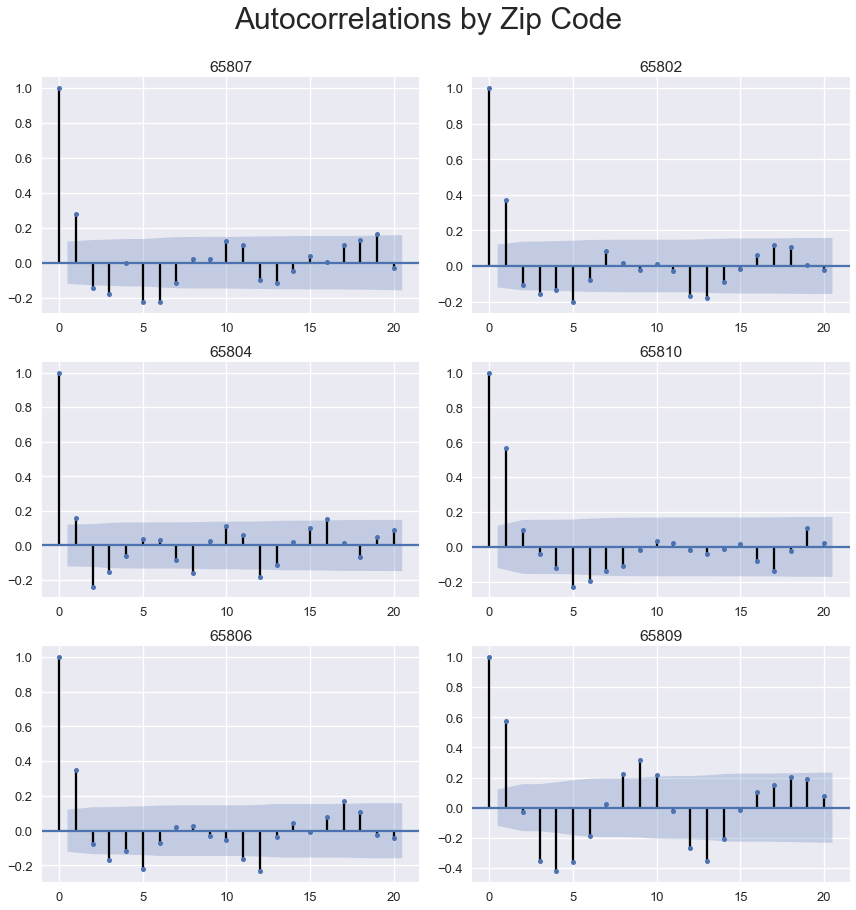

In [4]:
n = len(springfield_diff_2.columns)
fig, axs = plt.subplots(int(np.ceil(n/2)), 2, figsize=(12, 12))
fig.suptitle('Autocorrelations by Zip Code', y=1.05, fontsize=30)
axs_flat = axs.flatten()

for i, col in enumerate(springfield_diff_2.columns):
    plot_acf(springfield_diff_2[col], ax=axs_flat[i], lags=20, title=col)

plt.tight_layout()
plt.savefig('visualizations/autocorrelations-diff_2.png')
plt.show()

### PACF

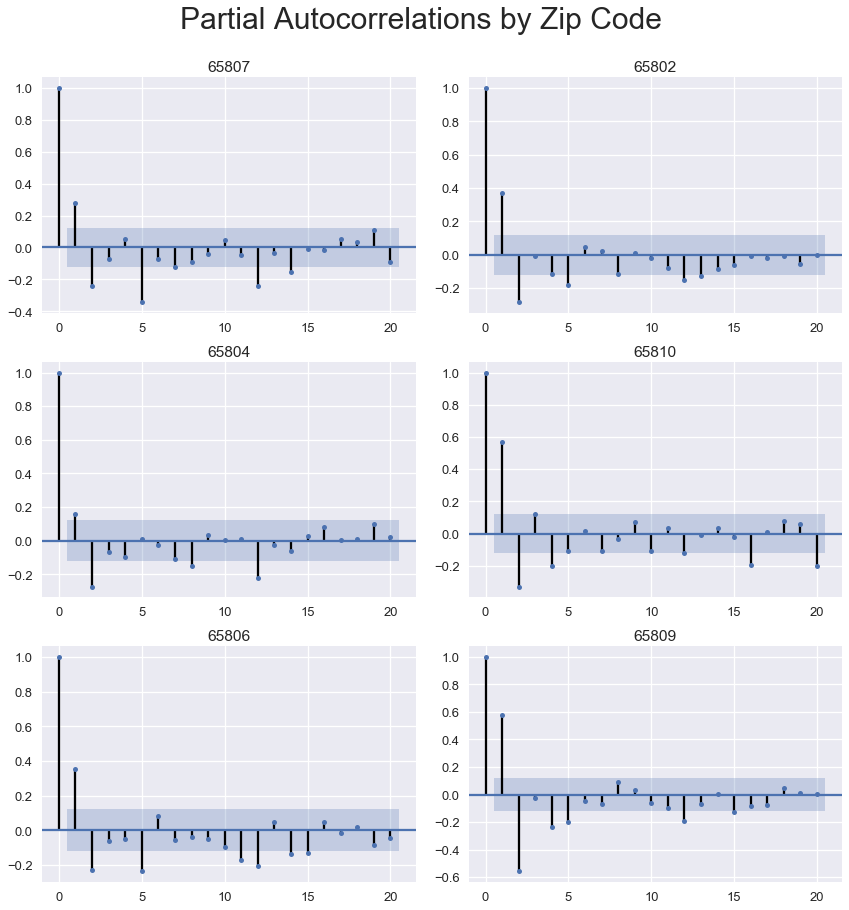

In [5]:
n = len(springfield_diff_2.columns)
fig, axs = plt.subplots(int(np.ceil(n/2)), 2, figsize=(12, 12))
fig.suptitle('Partial Autocorrelations by Zip Code', y=1.05, fontsize=30)
axs_flat = axs.flatten()

for i, col in enumerate(springfield_diff_2.columns):
    plot_pacf(springfield_diff_2[col], ax=axs_flat[i], lags=20, title=col)

plt.tight_layout()
plt.savefig('visualizations/partial-autocorrelations-diff_2.png')
plt.show()

### Model

> order is (p,q) p is determined by the AR (pacf), q is determined by the MA (acf)

                              ARMA Model Results                              
Dep. Variable:                  65807   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1463.280
Method:                       css-mle   S.D. of innovations            187.156
Date:                Wed, 27 Jan 2021   AIC                           2932.560
Time:                        22:16:10   BIC                           2942.741
Sample:                    06-01-1996   HQIC                          2936.671
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4473     20.904      0.021      0.983     -40.524      41.418
ar.L1.65807     0.3982      0.062      6.456      0.000       0.277       0.519
                                    Roots       

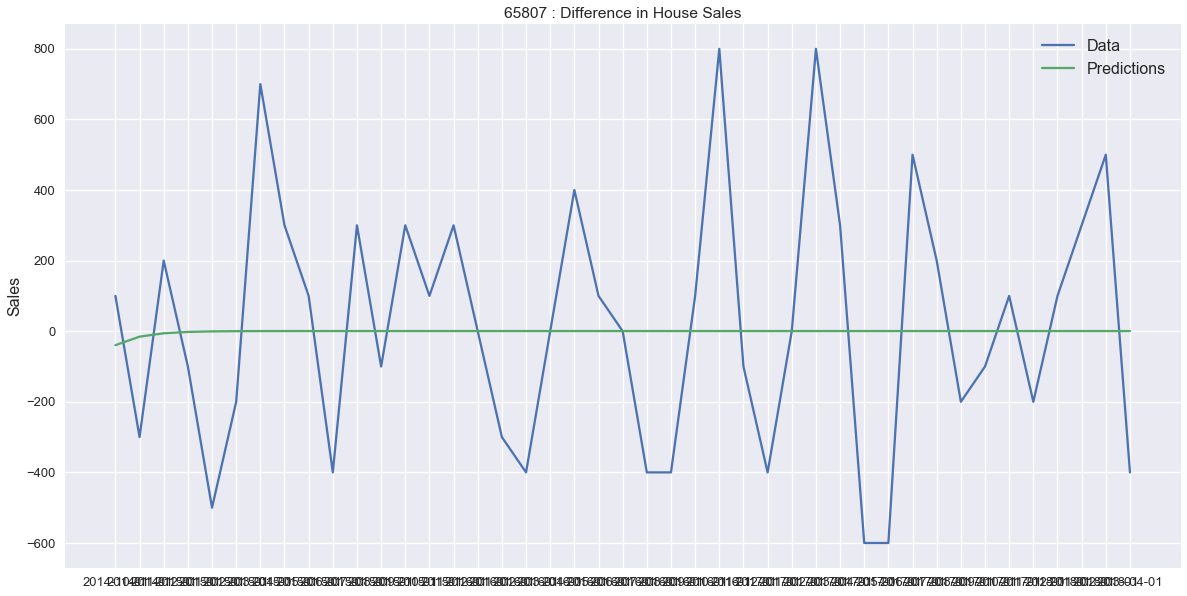

RMSE:  354

 
 

                              ARMA Model Results                              
Dep. Variable:                  65802   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1458.270
Method:                       css-mle   S.D. of innovations            182.925
Date:                Wed, 27 Jan 2021   AIC                           2922.540
Time:                        22:16:10   BIC                           2932.721
Sample:                    06-01-1996   HQIC                          2926.651
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0034     21.839      0.046      0.963     -41.801      43.808
ar.L1.65802     0.4373      0.061      7.219      0.000       0.319       0.556
                               

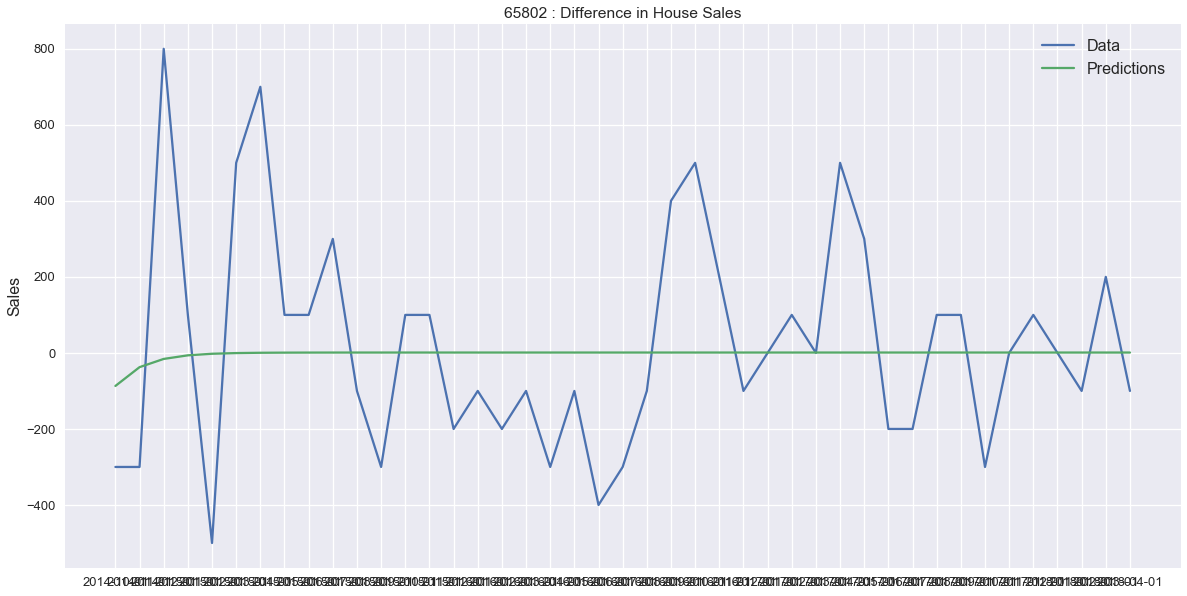

RMSE:  287

 
 

                              ARMA Model Results                              
Dep. Variable:                  65804   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1457.950
Method:                       css-mle   S.D. of innovations            182.744
Date:                Wed, 27 Jan 2021   AIC                           2921.900
Time:                        22:16:10   BIC                           2932.081
Sample:                    06-01-1996   HQIC                          2926.012
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0792     13.582     -0.079      0.937     -27.699      25.540
ar.L1.65804     0.0931      0.068      1.366      0.172      -0.041       0.227
                               

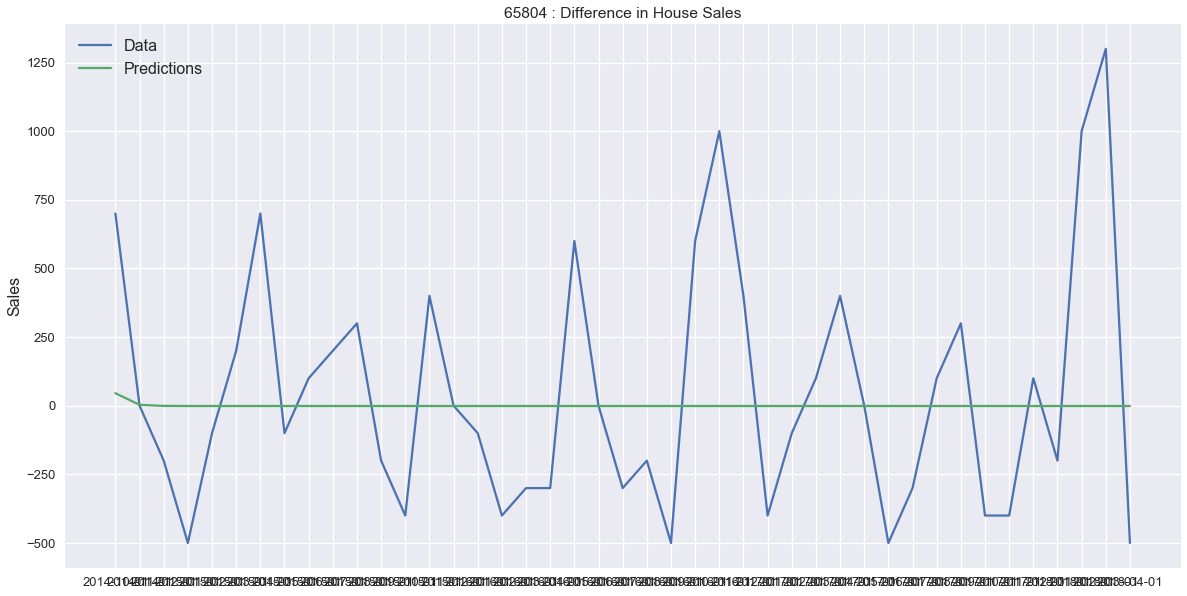

RMSE:  444

 
 

                              ARMA Model Results                              
Dep. Variable:                  65810   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1568.904
Method:                       css-mle   S.D. of innovations            302.264
Date:                Wed, 27 Jan 2021   AIC                           3143.809
Time:                        22:16:11   BIC                           3153.990
Sample:                    06-01-1996   HQIC                          3147.920
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8828     54.543      0.035      0.972    -105.019     108.784
ar.L1.65810     0.6292      0.052     11.985      0.000       0.526       0.732
                               

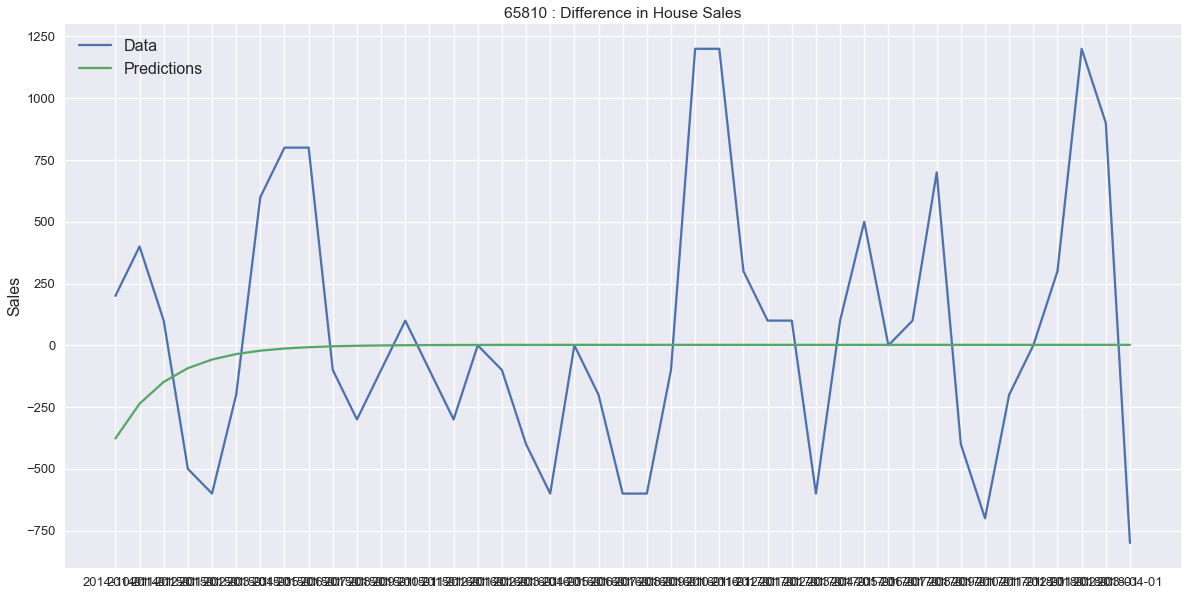

RMSE:  534

 
 

                              ARMA Model Results                              
Dep. Variable:                  65806   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1481.049
Method:                       css-mle   S.D. of innovations            202.903
Date:                Wed, 27 Jan 2021   AIC                           2968.098
Time:                        22:16:11   BIC                           2978.279
Sample:                    06-01-1996   HQIC                          2972.209
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3249     22.387     -0.059      0.953     -45.202      42.552
ar.L1.65806     0.3907      0.062      6.288      0.000       0.269       0.512
                               

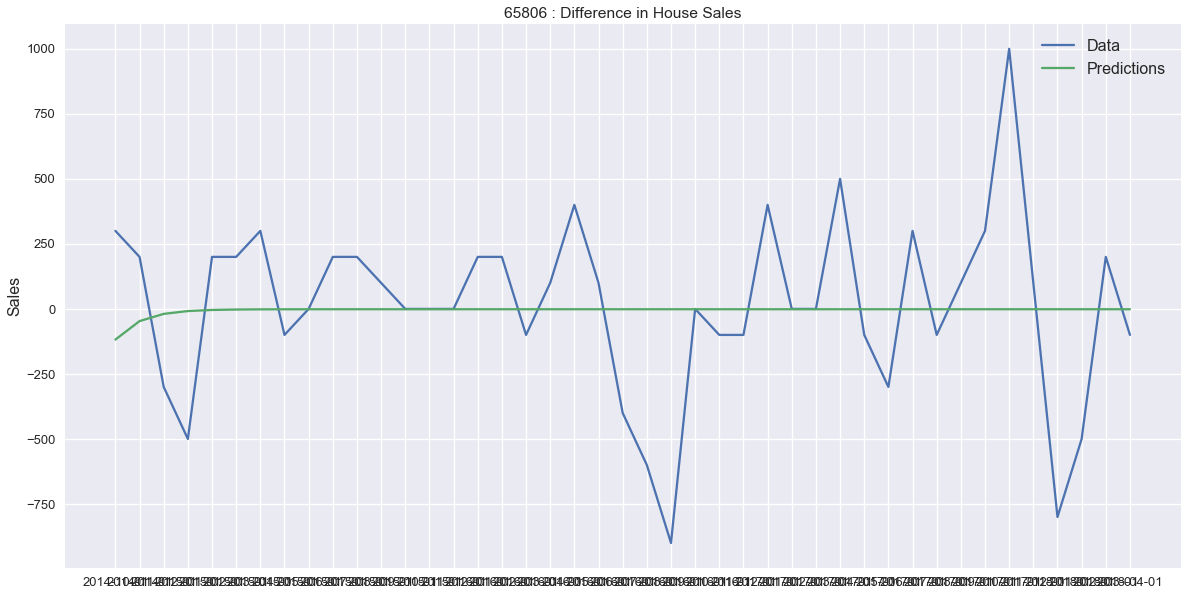

RMSE:  345

 
 

                              ARMA Model Results                              
Dep. Variable:                  65809   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1744.213
Method:                       css-mle   S.D. of innovations            670.468
Date:                Wed, 27 Jan 2021   AIC                           3494.427
Time:                        22:16:11   BIC                           3504.608
Sample:                    06-01-1996   HQIC                          3498.538
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.4742    133.856      0.063      0.950    -253.879     270.827
ar.L1.65809     0.6653      0.050     13.315      0.000       0.567       0.763
                               

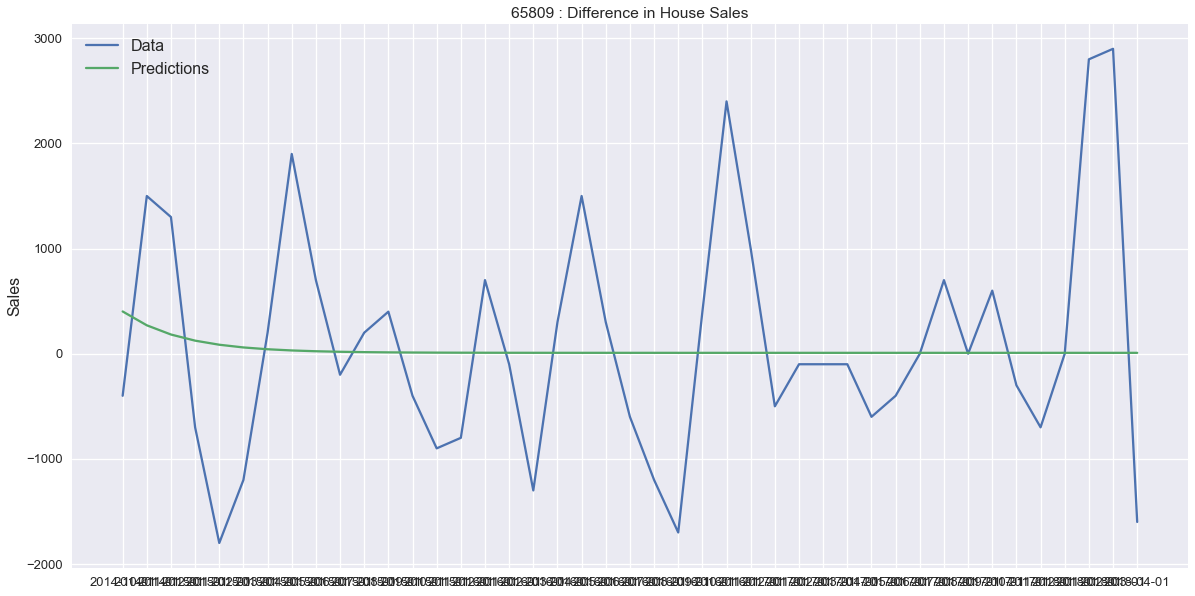

RMSE:  1103

 
 



In [30]:
for col in sf_diff_train:
    
    #creating the ARMA Model
    arma = ARMA(sf_diff_train[col], order=(1,0), freq='MS').fit()
    print(arma.summary())
    
    arma_forecast = arma.forecast(steps=43)[0]
    RMSE = np.sqrt(mean_squared_error(sf_diff_test[col], arma_forecast))
    
    # plotting forecast vs actual
    plt.figure(figsize=(20,10))

    plt.plot(sf_diff_test[col])
    plt.plot(arma_forecast)

    plt.legend(('Data', 'Predictions'), fontsize=16)
    plt.title(col + ' : Difference in House Sales')
    plt.ylabel('Sales', fontsize=16);
    
    plt.show()

    print('RMSE: ', round(RMSE))
    print('\n \n \n')

### Testing code, not ready to delete yet

In [7]:
mod_arma = ARMA(sf_diff_train['65807'], order=(1,0), freq='MS')

res_arma = mod_arma.fit()
    
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  65807   No. Observations:                  220
Model:                     ARMA(1, 0)   Log Likelihood               -1463.280
Method:                       css-mle   S.D. of innovations            187.156
Date:                Wed, 27 Jan 2021   AIC                           2932.560
Time:                        22:05:55   BIC                           2942.741
Sample:                    06-01-1996   HQIC                          2936.671
                         - 09-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4473     20.904      0.021      0.983     -40.524      41.418
ar.L1.65807     0.3982      0.062      6.456      0.000       0.277       0.519
                                    Roots       

In [8]:
arma_forecast = res_arma.forecast(steps=45)[0]
arma_forecast

array([-39.54932979, -15.47875626,  -5.89420561,  -2.07777759,
        -0.55813172,   0.04696905,   0.28791134,   0.38385104,
         0.42205283,   0.43726422,   0.44332117,   0.44573296,
         0.4466933 ,   0.4470757 ,   0.44722796,   0.44728859,
         0.44731273,   0.44732234,   0.44732617,   0.4473277 ,
         0.4473283 ,   0.44732854,   0.44732864,   0.44732868,
         0.44732869,   0.4473287 ,   0.4473287 ,   0.4473287 ,
         0.4473287 ,   0.4473287 ,   0.4473287 ,   0.4473287 ,
         0.4473287 ,   0.4473287 ,   0.4473287 ,   0.4473287 ,
         0.4473287 ,   0.4473287 ,   0.4473287 ,   0.4473287 ,
         0.4473287 ,   0.4473287 ,   0.4473287 ,   0.4473287 ,
         0.4473287 ])

We might need to un-transform the data values for RMSE to make sense?.

In [13]:
np.sqrt(mean_squared_error(sf_test['65807'], arma_forecast))

110442.44237133791

## ARIMA

### model

                             ARIMA Model Results                              
Dep. Variable:               D2.65807   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1449.680
Method:                       css-mle   S.D. of innovations            186.900
Date:                Wed, 27 Jan 2021   AIC                           2905.361
Time:                        22:13:45   BIC                           2915.514
Sample:                    06-01-1996   HQIC                          2909.462
                         - 07-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5819     20.990      0.123      0.902     -38.559      43.722
ar.L1.D2.65807     0.3988      0.062      6.442      0.000       0.277       0.520
                                    

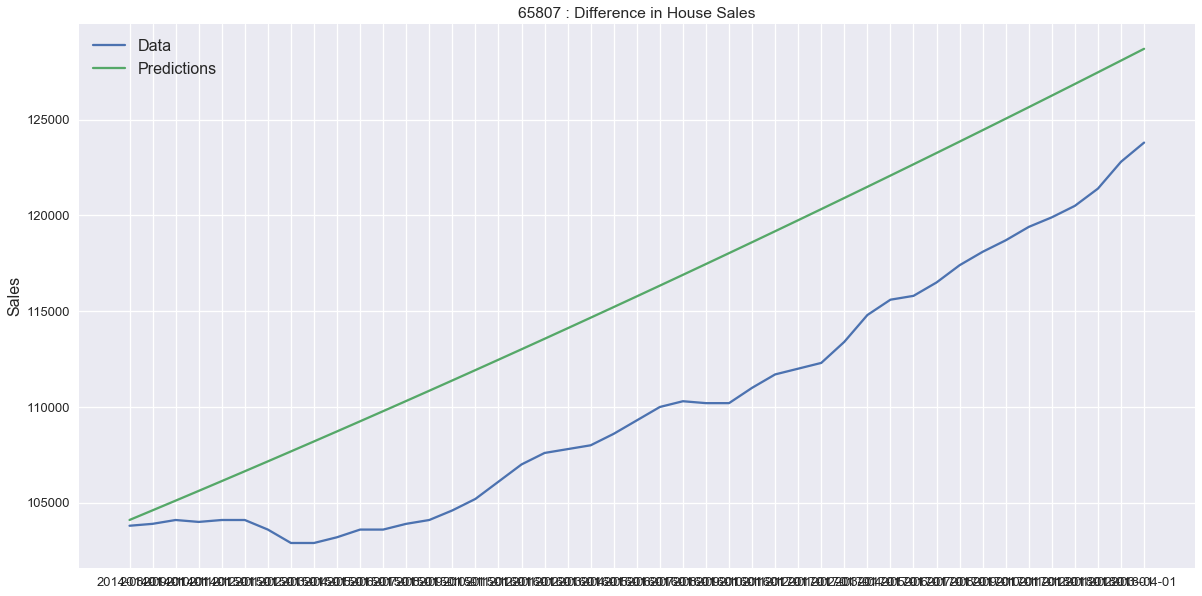

RMSE: 6041 
 
 

                             ARIMA Model Results                              
Dep. Variable:               D2.65802   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1445.499
Method:                       css-mle   S.D. of innovations            183.337
Date:                Wed, 27 Jan 2021   AIC                           2896.999
Time:                        22:13:45   BIC                           2907.152
Sample:                    06-01-1996   HQIC                          2901.100
                         - 07-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9610     21.677      0.137      0.891     -39.525      45.447
ar.L1.D2.65802     0.4291      0.061      6.997      0.000       0.309       0.549
                   

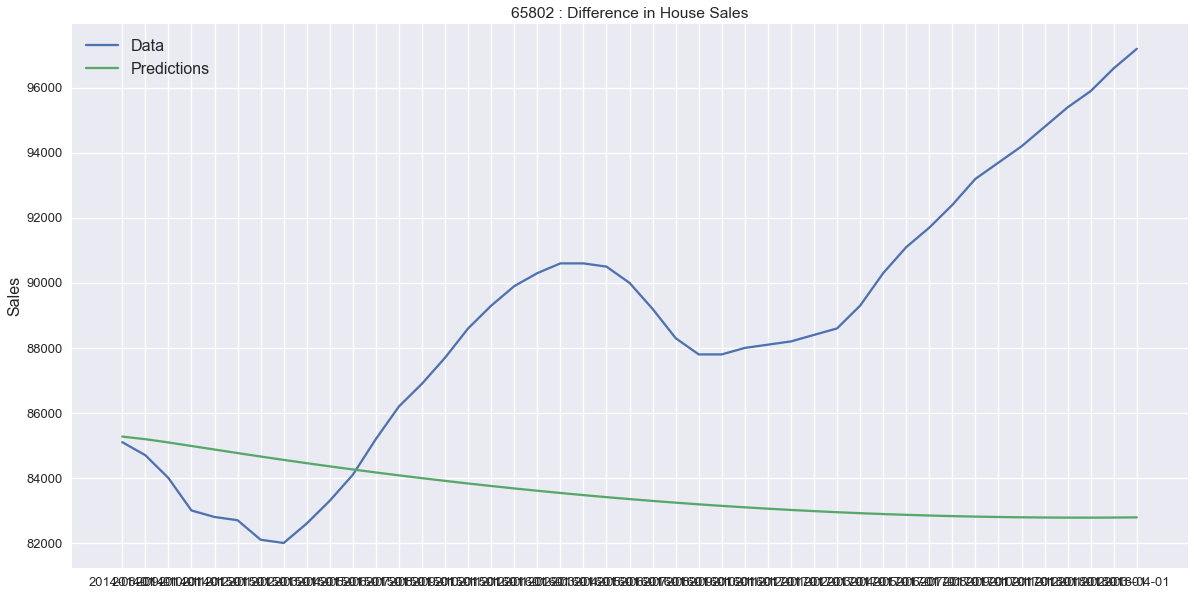

RMSE: 6989 
 
 

                             ARIMA Model Results                              
Dep. Variable:               D2.65804   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1435.018
Method:                       css-mle   S.D. of innovations            174.804
Date:                Wed, 27 Jan 2021   AIC                           2876.036
Time:                        22:13:46   BIC                           2886.190
Sample:                    06-01-1996   HQIC                          2880.137
                         - 07-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8406     13.791     -0.061      0.951     -27.870      26.189
ar.L1.D2.65804     0.1422      0.067      2.124      0.034       0.011       0.273
                   

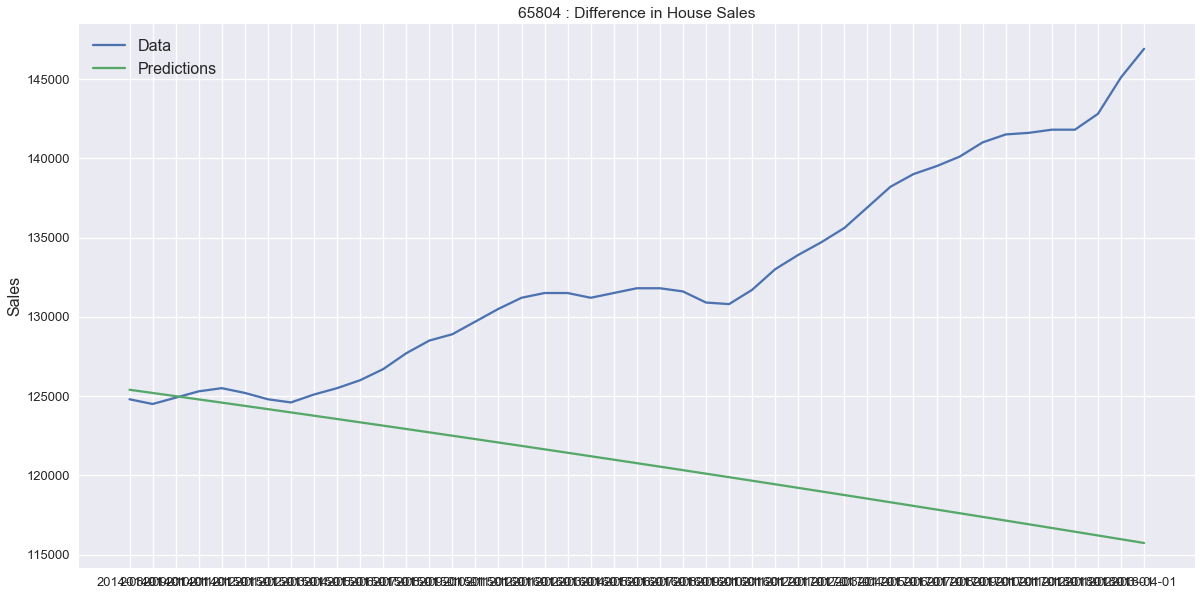

RMSE: 15011 
 
 

                             ARIMA Model Results                              
Dep. Variable:               D2.65810   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1552.112
Method:                       css-mle   S.D. of innovations            298.764
Date:                Wed, 27 Jan 2021   AIC                           3110.225
Time:                        22:13:46   BIC                           3120.378
Sample:                    06-01-1996   HQIC                          3114.326
                         - 07-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             15.0255     55.119      0.273      0.785     -93.006     123.057
ar.L1.D2.65810     0.6357      0.052     12.176      0.000       0.533       0.738
                  

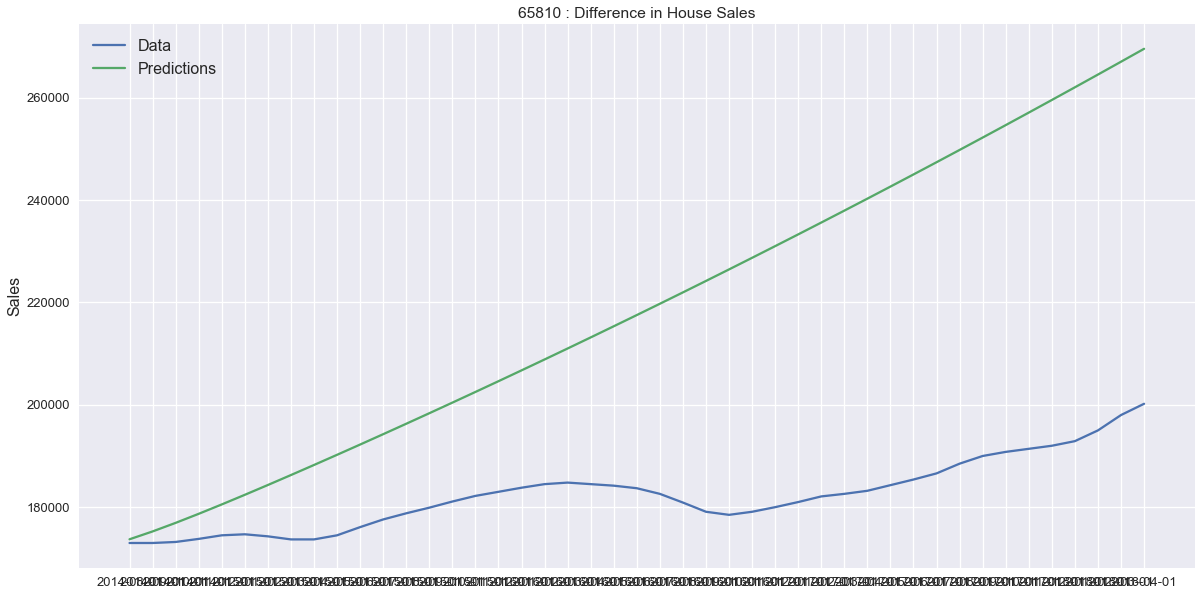

RMSE: 42907 
 
 

                             ARIMA Model Results                              
Dep. Variable:               D2.65806   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1467.043
Method:                       css-mle   S.D. of innovations            202.398
Date:                Wed, 27 Jan 2021   AIC                           2940.086
Time:                        22:13:46   BIC                           2950.239
Sample:                    06-01-1996   HQIC                          2944.187
                         - 07-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4117     22.470      0.107      0.915     -41.628      46.451
ar.L1.D2.65806     0.3917      0.062      6.297      0.000       0.270       0.514
                  

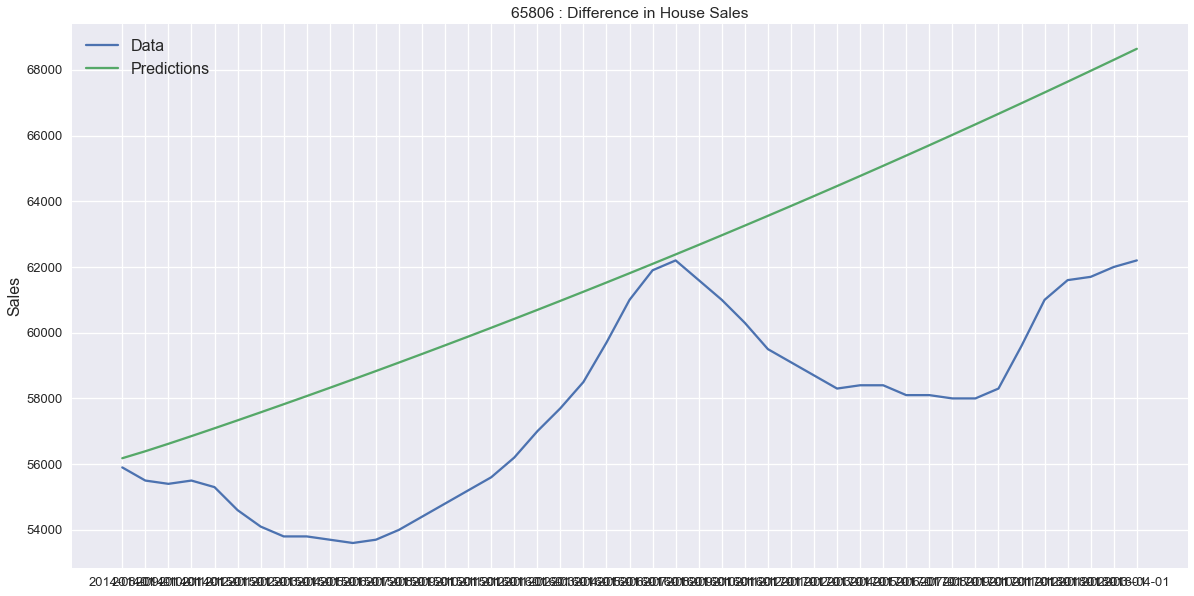

RMSE: 4890 
 
 

                             ARIMA Model Results                              
Dep. Variable:               D2.65809   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1729.345
Method:                       css-mle   S.D. of innovations            673.501
Date:                Wed, 27 Jan 2021   AIC                           3464.689
Time:                        22:13:47   BIC                           3474.843
Sample:                    06-01-1996   HQIC                          3468.790
                         - 07-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.2561    135.496      0.076      0.940    -255.310     275.823
ar.L1.D2.65809     0.6663      0.051     13.143      0.000       0.567       0.766
                   

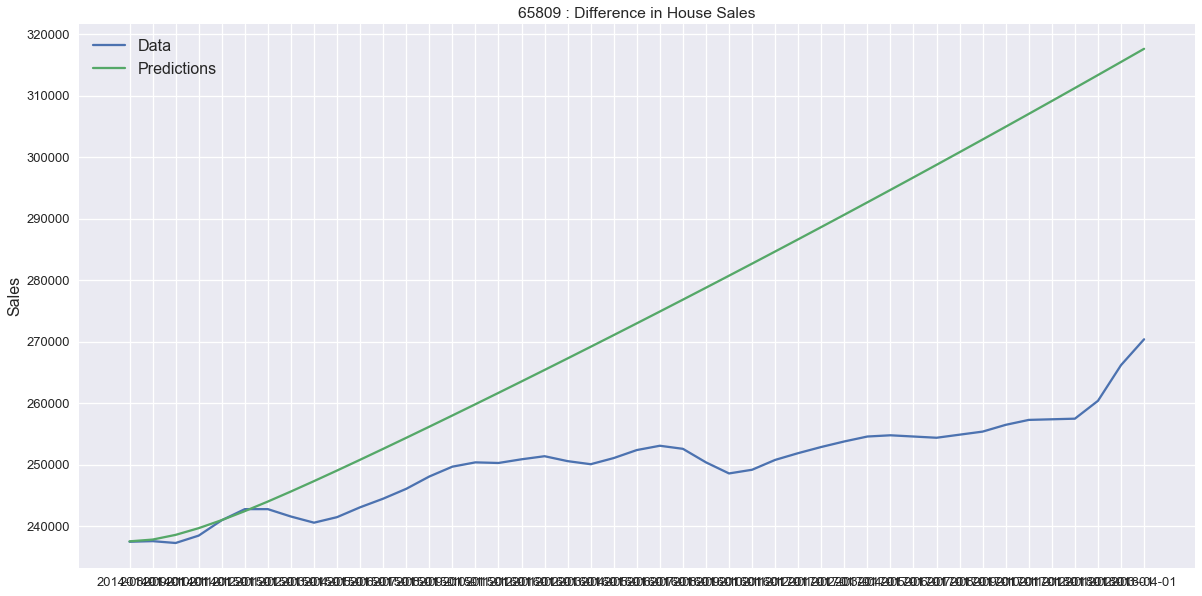

RMSE: 29993 
 
 



In [29]:
for col in sf_train:
    # model
    arima = ARIMA(sf_train[col], order= (1,2,0), freq='MS').fit()
    print(arima.summary())
    
    # forecast
    arima_forecast = arima.forecast(steps=45)[0]
    
    # plotting forecast vs actual
    plt.figure(figsize=(20,10))

    plt.plot(sf_test[col])
    plt.plot(arima_forecast)

    plt.legend(('Data', 'Predictions'), fontsize=16)
    plt.title(col + ' : Difference in House Sales')
    plt.ylabel('Sales', fontsize=16);
    
    plt.show()

    #RMSE
    RMSE = np.sqrt(mean_squared_error(sf_test[col], arima_forecast))
    print('RMSE:', round(RMSE), '\n \n \n')

### test code

In [15]:
arima = ARIMA(sf_train['65807'], order=(1,2,0), freq='MS').fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.65807   No. Observations:                  218
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1449.680
Method:                       css-mle   S.D. of innovations            186.900
Date:                Wed, 27 Jan 2021   AIC                           2905.361
Time:                        22:05:55   BIC                           2915.514
Sample:                    06-01-1996   HQIC                          2909.462
                         - 07-01-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5819     20.990      0.123      0.902     -38.559      43.722
ar.L1.D2.65807     0.3988      0.062      6.442      0.000       0.277       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5077           +0.0000j            2.5077            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
arima_forecast = arima.forecast(steps=45)[0]

np.sqrt(mean_squared_error(sf_test['65807'], arima_forecast))

6040.567109407307

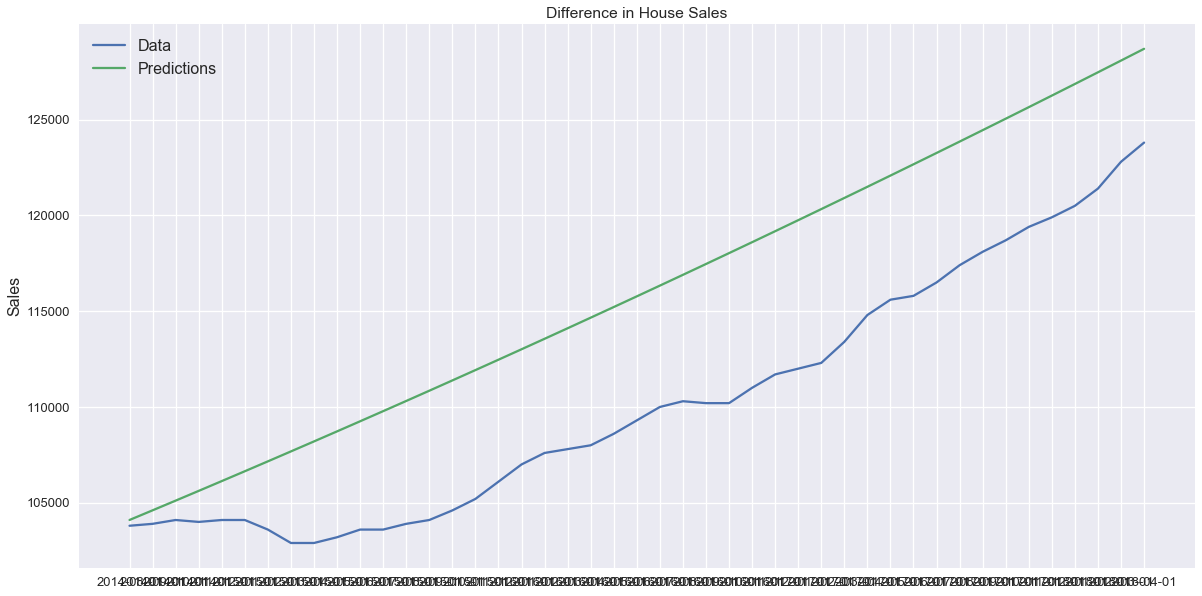

In [27]:
plt.figure(figsize=(20,10))

plt.plot(sf_test['65807'])
plt.plot(arima_forecast)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Difference in House Sales')
plt.ylabel('Sales', fontsize=16);

## Auto-ARIMA

## Facebook Prophet